<h1 align="center">
    Tic Tac Toe
</h1>

In [1]:
import sys
import sqlite3
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns
sns.set(
    style='whitegrid', 
    color_codes=True
)

In [4]:
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

## Warning filter

In [5]:
import warnings

In [6]:
warnings.filterwarnings('ignore')

## SQL Queries

In [7]:
X_Query: str = '''
SELECT 
    "ROW_1_1" as "ROW_1_1",
    "ROW_1_2" as "ROW_1_2",
    "ROW_1_3" as "ROW_1_3",
    "ROW_2_1" as "ROW_2_1",
    "ROW_2_2" as "ROW_2_2",
    "ROW_2_3" as "ROW_2_3",
    "ROW_3_1" as "ROW_3_1",
    "ROW_3_2" as "ROW_3_2",
    "ROW_3_3" as "ROW_3_3"
FROM "tic-tac-toe";
'''.strip()

In [8]:
y_Query: str = '''
SELECT 
    "RESULT" as "RESULT" 
FROM "tic-tac-toe";
'''.strip()

## Reading Dataset

In [9]:
conn = sqlite3.connect("Tic-Tac-Toe-Label-Encoded.sqlite3")

In [10]:
X = pd.read_sql(
    sql=X_Query, 
    con=conn
)

In [11]:
y = pd.read_sql(
    sql=y_Query, 
    con=conn
)

In [12]:
X_columns: list = X.columns.to_list()

In [13]:
y_columns: list = y.columns.to_list()

In [14]:
# for i in X_columns:
#     X[i].replace(
#         {
#             "x": 1, # Computer Input 
#             "o": 0, # User Input
#             "b": 2 # Blank
#         }, 
#         inplace=True
#     )
#     X[i] = pd.to_numeric(X[i])

In [15]:
X.head()

,ROW_1_1,ROW_1_2,ROW_1_3,ROW_2_1,ROW_2_2,ROW_2_3,ROW_3_1,ROW_3_2,ROW_3_3
0,1,1,1,1,0,0,1,0,0
1,1,1,1,1,0,0,0,1,0
2,1,1,1,1,0,0,0,0,1
3,1,1,1,1,0,0,0,2,2
4,1,1,1,1,0,0,2,0,2


## Label Encoding

In [16]:
y[y_columns[0]].value_counts()

1    626
0    332
Name: RESULT, dtype: int64

In [17]:
# from sklearn.preprocessing import LabelEncoder

# labelEncoder = LabelEncoder()
# labelEncoder.fit(y[y_columns[0]])
# y[y_columns[0]] = pd.DataFrame(labelEncoder.transform(y[y_columns[0]]))

In [18]:
df = pd.concat(
    objs=[X, y], 
    ignore_index=False, 
    sort=False, 
    axis=1
)

In [19]:
conn.close()

In [20]:
X.shape

(958, 9)

In [21]:
y.shape

(958, 1)

In [22]:
df.shape

(958, 10)

In [23]:
# df.to_csv("Tic-Tac-Toe-Label-Encoded.csv",index=False)

## Datatype Fixing of the Categorical data of y

In [24]:
for col in y_columns:
    y[col] = y[col].astype('category')

1    626
0    332
Name: RESULT, dtype: int64


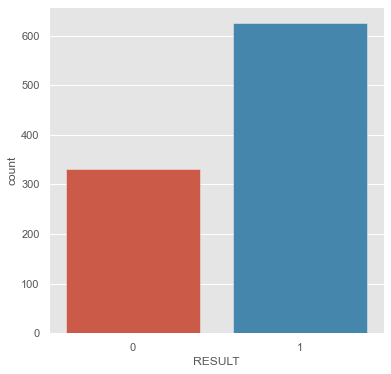

In [25]:
print(y[y_columns[0]].value_counts())
plt.figure(
    figsize=(6, 6)
)
sns.countplot(
    x=y[y_columns[0]]
);

## Dummy Variable 

In [26]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X = pd.get_dummies(
    X, 
    columns=X_columns
)

In [27]:
X.head()

,ROW_1_1_0,ROW_1_1_1,ROW_1_1_2,ROW_1_2_0,ROW_1_2_1,ROW_1_2_2,ROW_1_3_0,ROW_1_3_1,ROW_1_3_2,ROW_2_1_0,...,ROW_2_3_2,ROW_3_1_0,ROW_3_1_1,ROW_3_1_2,ROW_3_2_0,ROW_3_2_1,ROW_3_2_2,ROW_3_3_0,ROW_3_3_1,ROW_3_3_2
0,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
1,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
2,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
4,0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1


In [28]:
# X.to_csv("test.csv",index=False)

## Splitting the dataset into the Training set and Test set

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=1,
    stratify=y
)

In [30]:
# X_train = X.copy()
# y_train = y.copy()

## Classifier

In [31]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

## XGboost

In [32]:
# classifier = XGBClassifier(
#     booster = 'gbtree',
#     max_depth=5,
#     n_estimators=1500,
#     learning_rate=0.3,
#     importance_type='gain',
#     random_state= 0,
#     n_jobs=8
# )

## Logistic Regression

In [33]:
classifier = LogisticRegression()

In [34]:
classifier.fit(X_train, y_train);

## Model Saving

In [35]:
import joblib

In [36]:
joblib.dump(classifier, "Tic-Tac-Toe-LG.joblib.dat")

['Tic-Tac-Toe-LG.joblib.dat']

In [37]:
classifier = joblib.load("Tic-Tac-Toe-LG.joblib.dat")
prediction = classifier.predict(X_test)
cm = confusion_matrix(
    y_true=y_test, 
    y_pred=prediction
)
print(cm)
print("Accuracy: {}%".format(round(accuracy_score(y_test, prediction) * 100, 2)))
print(
    classification_report(
        y_true=y_test,
        y_pred=prediction,
        target_names=['Negetive', 'Positive'],
        zero_division='warn',
        digits=5
    )
)

[[ 81   2]
 [  0 157]]
Accuracy: 99.17%
              precision    recall  f1-score   support

    Negetive    1.00000   0.97590   0.98780        83
    Positive    0.98742   1.00000   0.99367       157

    accuracy                        0.99167       240
   macro avg    0.99371   0.98795   0.99074       240
weighted avg    0.99177   0.99167   0.99164       240

